**Authors:** Jozef Hanč, Martina Hančová <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Numerical study - Numerical calculations of ratio of i.r.v.'s </font>

# <font color = brown>Summary of results

<font size=5> Computational tools: </font>  **<font size=5>Python (Pandas)</font>** 


---

In [1]:
# Simulation parameter
N = 3  # Number of test points 10^N

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

from numpy import inf as INF, array as v
from time import time

import math, cmath
import numba
import scipy

# Approximate formulas for precisions expressed in bits and decimal places
bits = lambda d: round((d + 1) * np.log(10) / np.log(2))
dps = lambda b: round(b * np.log(2) / np.log(10) - 1)

# Setting the precision parameter
precision = 2

# Setting the display of real numbers in scientific notation for numpy
np.set_printoptions(precision=precision, suppress=False, formatter={'float': f'{{:0.{precision}e}}'.format})

# Setting the display of real numbers in scientific notation for pandas DataFrames
pd.options.display.float_format = f'{{:0.{precision}e}}'.format

def abs_errs(df1, df2):
    N = len(df1)
    errors = v([abs(df1[i] - df2[i]) for i in range(N)])
    return errors

# Function to convert the string representation of the list to the actual list of floats
import ast

# Function to convert string representation of lists to actual lists of floats across the entire DataFrame
def convert_str_lists_to_floats(df):
    def str_to_list_of_floats(s):
        try:
            # Convert if s is a string that represents a list
            return [float(x) for x in ast.literal_eval(s)] if isinstance(s, str) and s.startswith('[') else s
        except (ValueError, SyntaxError):
            # Return original value if conversion fails
            return s
    
    # Apply the conversion function to the entire DataFrame
    return df.map(str_to_list_of_floats)

# showing a dataframe in scientific notation
def show_in_sci_format(df, precision=2, fullcolwidth=True, col_width=300):
    # Apply formatting to numpy arrays in each cell
    dff = df.map(lambda x: [f"{i:.{precision}e}" if isinstance(i, (float, np.float64, np.float32)) else i for i in x] if isinstance(x, (np.ndarray, list)) else x)
    return show_allrowscols(dff, fullcolwidth=fullcolwidth, col_width=col_width)

# Loading results of numerical study

In [2]:
# Read all sheets of the Excel file into a dictionary of DataFrames
dfs = pd.read_excel('data/NumStudyResultsN1000.xlsx', sheet_name=None)

In [3]:
experiments = dfs.keys()
experiments

dict_keys(['RuntimesBK-Python', 'RuntimesBK-Matlab', 'Analytic-Sage-fast', 'DE-CC-Python', 'BK-algorithms', 'BKB-CC-Num-Par', 'BKB-CC-Num-Par-Nodes', 'BKB-CC-Num', 'BKB-CC-Num-Nodes', 'BKB-CC-Sym', 'BKB-CC-Sym-Par', 'BKB-CC-Sym-Nodes', 'BKB-CC-Sym-Par-Nodes', 'BK-TR-CC-sym'])

## Python data

In [4]:
# Convert string lists to floats from the dataframe
dP = convert_str_lists_to_floats(dfs['DE-CC-Python'])

# Adjust the index by adding 3 to each existing index
dP.index += 3

# Assign the converted and indexed DataFrame to benchres
benchres = dP.copy()

# Display benchres in scientific notation format
show_in_sci_format(benchres)

,err,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),CC-conv
3,1.00e-03,"[3.84e-02, 9.20e-01, 3.87e-16, 9.68e-05, 3.57e-11, 4.72e+07]","[1.51e-03, 1.26e+00, 3.87e-16, 9.68e-05, 3.57e-11, 4.72e+07]","[2.20e-04, 6.58e+00, 3.87e-16, 9.68e-05, 3.57e-11, 4.72e+07]","[6.70e-04, 3.50e+00, 2.30e-11, 2.40e-06, 7.10e-09, 7.35e+02]","[1.63e-03, 2.56e+00, 2.47e-11, 7.10e-06, 1.94e-08, 2.51e+02]","[1.58e-04, 4.40e+00, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
4,1.00e-04,"[4.00e-02, 4.64e-01, 2.11e-15, 6.39e-06, 2.44e-11, 1.60e+04]","[1.54e-03, 1.32e+00, 2.11e-15, 6.39e-06, 2.44e-11, 1.60e+04]","[2.04e-04, 2.73e+00, 2.11e-15, 6.39e-06, 2.44e-11, 1.60e+04]","[6.71e-04, 3.37e+00, 5.67e-13, 7.61e-08, 6.04e-10, 1.63e+02]","[1.66e-03, 1.77e+00, 9.30e-14, 7.58e-08, 1.65e-10, 1.41e+03]","[1.66e-04, 1.17e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
5,1.00e-05,"[4.52e-02, 4.01e-01, 0.00e+00, 1.44e-08, 1.13e-12, 6.76e+04]","[1.73e-03, 9.87e-01, 5.55e-17, 1.44e-08, 1.14e-12, 6.12e+04]","[2.27e-04, 2.73e+00, 5.55e-17, 1.44e-08, 1.14e-12, 6.12e+04]","[6.82e-04, 3.87e+00, 5.17e-12, 1.06e-08, 6.05e-10, 4.64e+01]","[1.65e-03, 2.37e+00, 1.08e-13, 1.02e-08, 6.27e-11, 1.84e+02]","[1.63e-04, 5.94e+00, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
6,1.00e-06,"[5.15e-02, 5.66e-01, 1.04e-17, 7.17e-09, 3.63e-14, 1.90e+05]","[1.96e-03, 1.26e+00, 1.04e-17, 7.17e-09, 3.64e-14, 1.89e+05]","[2.68e-04, 3.83e+00, 1.04e-17, 7.17e-09, 3.64e-14, 1.89e+05]","[6.93e-04, 5.75e+00, 5.96e-12, 7.22e-09, 7.03e-10, 4.08e+01]","[1.67e-03, 1.75e+00, 2.57e-15, 3.36e-09, 8.28e-12, 3.23e+02]","[1.58e-04, 9.10e+00, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
7,1.00e-07,"[5.53e-02, 4.69e-01, 1.39e-17, 2.84e-09, 1.11e-14, 4.89e+04]","[2.07e-03, 8.43e-01, 1.04e-17, 2.84e-09, 1.11e-14, 4.90e+04]","[2.85e-04, 3.37e+00, 1.04e-17, 2.84e-09, 1.11e-14, 4.90e+04]","[6.93e-04, 4.66e+00, 5.84e-12, 4.94e-09, 6.80e-10, 4.22e+01]","[1.69e-03, 2.69e+00, 6.59e-17, 3.83e-10, 6.27e-13, 3.98e+03]","[1.60e-04, 1.52e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
8,1.00e-08,"[5.99e-02, 7.48e-01, 0.00e+00, 1.28e-10, 9.13e-16, 4.07e+04]","[2.32e-03, 1.13e+00, 0.00e+00, 1.28e-10, 9.24e-16, 3.83e+04]","[3.24e-04, 3.88e+00, 0.00e+00, 1.28e-10, 9.24e-16, 3.83e+04]","[6.88e-04, 5.25e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.30e+01]","[1.63e-03, 1.99e+00, 1.73e-18, 1.52e-11, 3.18e-14, 3.57e+02]","[1.61e-04, 1.15e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
9,1.00e-09,"[6.37e-02, 3.78e-01, 0.00e+00, 1.13e-12, 9.58e-17, 1.33e+05]","[2.48e-03, 1.30e+00, 0.00e+00, 1.13e-12, 9.66e-17, 1.25e+05]","[3.34e-04, 3.98e+00, 0.00e+00, 1.13e-12, 9.66e-17, 1.25e+05]","[7.01e-04, 4.88e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.29e+01]","[1.63e-03, 1.20e+00, 1.39e-17, 1.22e-12, 2.87e-15, 6.39e+02]","[1.57e-04, 1.18e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
10,1.00e-10,"[7.09e-02, 3.33e-01, 0.00e+00, 2.86e-13, 1.26e-17, 9.95e+04]","[2.75e-03, 7.50e-01, 0.00e+00, 2.86e-13, 1.29e-17, 9.58e+04]","[3.67e-04, 3.90e+00, 0.00e+00, 2.86e-13, 1.29e-17, 9.58e+04]","[6.88e-04, 3.16e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.29e+01]","[1.67e-03, 2.09e+00, 0.00e+00, 1.51e-13, 5.00e-16, 2.88e+02]","[1.55e-04, 8.45e+00, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
11,1.00e-11,"[7.52e-02, 3.44e-01, 0.00e+00, 8.55e-14, 5.00e-18, 2.83e+04]","[2.95e-03, 1.35e+00, 0.00e+00, 8.55e-14, 4.56e-18, 3.64e+04]","[3.95e-04, 3.68e+00, 0.00e+00, 8.55e-14, 4.56e-18, 3.64e+04]","[6.98e-04, 4.93e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.29e+01]","[1.64e-03, 1.40e+00, 0.00e+00, 4.48e-13, 1.49e-15, 1.32e+02]","[1.59e-04, 1.21e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"
12,1.00e-12,"[8.27e-02, 2.40e-01, 0.00e+00, 1.17e-15, 3.80e-18, 5.35e+03]","[3.22e-03, 8.13e-01, 0.00e+00, 1.17e-15, 3.18e-18, 8.12e+03]","[4.34e-04, 4.09e+00, 0.00e+00, 1.17e-15, 3.18e-18, 8.12e+03]","[7.05e-04, 4.84e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.29e+01]","[1.64e-03, 1.32e+00, 0.00e+00, 8.33e-16, 7.01e-18, 3.49e+03]","[1.63e-04, 1.41e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]"


## SageMath fast data with quadruple precision

In [5]:
# covnert data, adjust the index, and display in scientific notation
dS = convert_str_lists_to_floats(dfs['Analytic-Sage-fast'])
dS.index += 3
show_in_sci_format(dS)

,err,Analytic Sage fast
3,1.00e-03,"[5.59e-04, 1.86e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
4,1.00e-04,"[5.47e-04, 1.02e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
5,1.00e-05,"[5.52e-04, 1.47e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
6,1.00e-06,"[5.55e-04, 9.97e-01, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
7,1.00e-07,"[5.46e-04, 1.63e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
8,1.00e-08,"[5.69e-04, 1.86e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
9,1.00e-09,"[5.48e-04, 3.62e-01, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
10,1.00e-10,"[5.66e-04, 6.23e-01, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
11,1.00e-11,"[5.48e-04, 5.48e-01, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
12,1.00e-12,"[5.54e-04, 1.55e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"


In [6]:
benchres['Analytic'] = dS['Analytic Sage fast']
show_in_sci_format(benchres)

,err,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),CC-conv,Analytic
3,1.00e-03,"[3.84e-02, 9.20e-01, 3.87e-16, 9.68e-05, 3.57e-11, 4.72e+07]","[1.51e-03, 1.26e+00, 3.87e-16, 9.68e-05, 3.57e-11, 4.72e+07]","[2.20e-04, 6.58e+00, 3.87e-16, 9.68e-05, 3.57e-11, 4.72e+07]","[6.70e-04, 3.50e+00, 2.30e-11, 2.40e-06, 7.10e-09, 7.35e+02]","[1.63e-03, 2.56e+00, 2.47e-11, 7.10e-06, 1.94e-08, 2.51e+02]","[1.58e-04, 4.40e+00, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]","[5.59e-04, 1.86e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
4,1.00e-04,"[4.00e-02, 4.64e-01, 2.11e-15, 6.39e-06, 2.44e-11, 1.60e+04]","[1.54e-03, 1.32e+00, 2.11e-15, 6.39e-06, 2.44e-11, 1.60e+04]","[2.04e-04, 2.73e+00, 2.11e-15, 6.39e-06, 2.44e-11, 1.60e+04]","[6.71e-04, 3.37e+00, 5.67e-13, 7.61e-08, 6.04e-10, 1.63e+02]","[1.66e-03, 1.77e+00, 9.30e-14, 7.58e-08, 1.65e-10, 1.41e+03]","[1.66e-04, 1.17e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]","[5.47e-04, 1.02e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
5,1.00e-05,"[4.52e-02, 4.01e-01, 0.00e+00, 1.44e-08, 1.13e-12, 6.76e+04]","[1.73e-03, 9.87e-01, 5.55e-17, 1.44e-08, 1.14e-12, 6.12e+04]","[2.27e-04, 2.73e+00, 5.55e-17, 1.44e-08, 1.14e-12, 6.12e+04]","[6.82e-04, 3.87e+00, 5.17e-12, 1.06e-08, 6.05e-10, 4.64e+01]","[1.65e-03, 2.37e+00, 1.08e-13, 1.02e-08, 6.27e-11, 1.84e+02]","[1.63e-04, 5.94e+00, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]","[5.52e-04, 1.47e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
6,1.00e-06,"[5.15e-02, 5.66e-01, 1.04e-17, 7.17e-09, 3.63e-14, 1.90e+05]","[1.96e-03, 1.26e+00, 1.04e-17, 7.17e-09, 3.64e-14, 1.89e+05]","[2.68e-04, 3.83e+00, 1.04e-17, 7.17e-09, 3.64e-14, 1.89e+05]","[6.93e-04, 5.75e+00, 5.96e-12, 7.22e-09, 7.03e-10, 4.08e+01]","[1.67e-03, 1.75e+00, 2.57e-15, 3.36e-09, 8.28e-12, 3.23e+02]","[1.58e-04, 9.10e+00, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]","[5.55e-04, 9.97e-01, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
7,1.00e-07,"[5.53e-02, 4.69e-01, 1.39e-17, 2.84e-09, 1.11e-14, 4.89e+04]","[2.07e-03, 8.43e-01, 1.04e-17, 2.84e-09, 1.11e-14, 4.90e+04]","[2.85e-04, 3.37e+00, 1.04e-17, 2.84e-09, 1.11e-14, 4.90e+04]","[6.93e-04, 4.66e+00, 5.84e-12, 4.94e-09, 6.80e-10, 4.22e+01]","[1.69e-03, 2.69e+00, 6.59e-17, 3.83e-10, 6.27e-13, 3.98e+03]","[1.60e-04, 1.52e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]","[5.46e-04, 1.63e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
8,1.00e-08,"[5.99e-02, 7.48e-01, 0.00e+00, 1.28e-10, 9.13e-16, 4.07e+04]","[2.32e-03, 1.13e+00, 0.00e+00, 1.28e-10, 9.24e-16, 3.83e+04]","[3.24e-04, 3.88e+00, 0.00e+00, 1.28e-10, 9.24e-16, 3.83e+04]","[6.88e-04, 5.25e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.30e+01]","[1.63e-03, 1.99e+00, 1.73e-18, 1.52e-11, 3.18e-14, 3.57e+02]","[1.61e-04, 1.15e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]","[5.69e-04, 1.86e+00, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
9,1.00e-09,"[6.37e-02, 3.78e-01, 0.00e+00, 1.13e-12, 9.58e-17, 1.33e+05]","[2.48e-03, 1.30e+00, 0.00e+00, 1.13e-12, 9.66e-17, 1.25e+05]","[3.34e-04, 3.98e+00, 0.00e+00, 1.13e-12, 9.66e-17, 1.25e+05]","[7.01e-04, 4.88e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.29e+01]","[1.63e-03, 1.20e+00, 1.39e-17, 1.22e-12, 2.87e-15, 6.39e+02]","[1.57e-04, 1.18e+01, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]","[5.48e-04, 3.62e-01, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
10,1.00e-10,"[7.09e-02, 3.33e-01, 0.00e+00, 2.86e-13, 1.26e-17, 9.95e+04]","[2.75e-03, 7.50e-01, 0.00e+00, 2.86e-13, 1.29e-17, 9.58e+04]","[3.67e-04, 3.90e+00, 0.00e+00, 2.86e-13, 1.29e-17, 9.58e+04]","[6.88e-04, 3.16e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.29e+01]","[1.67e-03, 2.09e+00, 0.00e+00, 1.51e-13, 5.00e-16, 2.88e+02]","[1.55e-04, 8.45e+00, 0.00e+00, 2.22e-16, 4.67e-18, 3.66e+03]","[5.66e-04, 6.23e-01, 0.00e+00, 2.78e-16, 6.14e-18, 1.25e+02]"
11,1.00e-11,"[7.52e-02, 3.44e-01, 0.00e+00, 8.55e-14, 5.00e-18, 2.83e+04]","[2.95e-03, 1.35e+00, 0.00e+00, 8.55e-14, 4.56e-18, 3.64e+04]","[3.95e-04, 3.68e+00, 0.00e+00, 8.55e-14, 4.56e-18, 3.64e+04]","[6.98e-04, 4.93e+00, 5.82e-12, 4.96e-09, 6.78e-10, 4.29e+01]","[1.64e-03, 1.40e+00, 0.00e+00, 4.48e-13, 1

## Adding MATLAB data

In [7]:
experiments

dict_keys(['RuntimesBK-Python', 'RuntimesBK-Matlab', 'Analytic-Sage-fast', 'DE-CC-Python', 'BK-algorithms', 'BKB-CC-Num-Par', 'BKB-CC-Num-Par-Nodes', 'BKB-CC-Num', 'BKB-CC-Num-Nodes', 'BKB-CC-Sym', 'BKB-CC-Sym-Par', 'BKB-CC-Sym-Nodes', 'BKB-CC-Sym-Par-Nodes', 'BK-TR-CC-sym'])

In [8]:
# covnert data, adjust the index, and display in scientific notation
dTR = convert_str_lists_to_floats(dfs['BK-TR-CC-sym'])
dBP = convert_str_lists_to_floats(dfs['BKB-CC-Sym-Par'])
dB = convert_str_lists_to_floats(dfs['BKB-CC-Sym'])
dTR.index += 3
dBP.index += 3
dB.index += 3

In [9]:
dBP

,err,method,rt,rtPerPoint,acceleration,error
3,1.00e-03,BKB:CC129:Infs:SymDer:parCPU:1e-03,4.07e-01,4.07e-04,1.00e+00,5.27e-08
4,1.00e-04,BKB:CC129:Infs:SymDer:parCPU:1e-04,4.48e-01,4.48e-04,9.09e-01,1.11e-08
5,1.00e-05,BKB:CC129:Infs:SymDer:parCPU:1e-05,5.19e-01,5.19e-04,7.85e-01,7.36e-09
6,1.00e-06,BKB:CC129:Infs:SymDer:parCPU:1e-06,6.78e-01,6.78e-04,6.00e-01,5.00e-09
7,1.00e-07,BKB:CC129:Infs:SymDer:parCPU:1e-07,9.76e-01,9.76e-04,4.17e-01,4.96e-09
8,1.00e-08,BKB:CC129:Infs:SymDer:parCPU:1e-08,1.29e+00,1.29e-03,3.15e-01,4.96e-09
9,1.00e-09,BKB:CC129:Infs:SymDer:parCPU:1e-09,1.62e+00,1.62e-03,2.51e-01,4.96e-09
10,1.00e-10,BKB:CC129:Infs:SymDer:parCPU:1e-10,2.19e+00,2.19e-03,1.86e-01,4.96e-09
11,1.00e-11,BKB:CC129:Infs:SymDer:parCPU:1e-11,2.85e+00,2.85e-03,1.43e-01,4.96e-09
12,1.00e-12,BKB:CC129:Infs:SymDer:parCPU:1e-12,3.38e+00,3.38e-03,1.21e-01,4.96e-09


In [10]:
dB

,err,method,rt,rtPerPoint,acceleration,error
3,1.00e-03,BKB:CC129:Infs:SymDer:1e-03,2.23e+00,2.23e-03,1.00e+00,5.27e-08
4,1.00e-04,BKB:CC129:Infs:SymDer:1e-04,2.49e+00,2.49e-03,8.95e-01,1.11e-08
5,1.00e-05,BKB:CC129:Infs:SymDer:1e-05,2.94e+00,2.94e-03,7.57e-01,7.36e-09
6,1.00e-06,BKB:CC129:Infs:SymDer:1e-06,3.83e+00,3.83e-03,5.82e-01,5.00e-09
7,1.00e-07,BKB:CC129:Infs:SymDer:1e-07,5.85e+00,5.85e-03,3.81e-01,4.96e-09
8,1.00e-08,BKB:CC129:Infs:SymDer:1e-08,7.93e+00,7.93e-03,2.81e-01,4.96e-09
9,1.00e-09,BKB:CC129:Infs:SymDer:1e-09,9.95e+00,9.95e-03,2.24e-01,4.96e-09
10,1.00e-10,BKB:CC129:Infs:SymDer:1e-10,1.35e+01,1.35e-02,1.64e-01,4.96e-09
11,1.00e-11,BKB:CC129:Infs:SymDer:1e-11,1.79e+01,1.79e-02,1.25e-01,4.96e-09
12,1.00e-12,BKB:CC129:Infs:SymDer:1e-12,2.09e+01,2.09e-02,1.06e-01,4.96e-09


# Run Times

In [11]:
N

3

In [12]:
times = benchres.iloc[:,1:].map(lambda x: x[0]).div(10**N)
times

,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),CC-conv,Analytic
3,3.84e-05,1.51e-06,2.20e-07,6.70e-07,1.63e-06,1.58e-07,5.59e-07
4,4.00e-05,1.54e-06,2.04e-07,6.71e-07,1.66e-06,1.66e-07,5.47e-07
5,4.52e-05,1.73e-06,2.27e-07,6.82e-07,1.65e-06,1.63e-07,5.52e-07
6,5.15e-05,1.96e-06,2.68e-07,6.93e-07,1.67e-06,1.58e-07,5.55e-07
7,5.53e-05,2.07e-06,2.85e-07,6.93e-07,1.69e-06,1.60e-07,5.46e-07
8,5.99e-05,2.32e-06,3.24e-07,6.88e-07,1.63e-06,1.61e-07,5.69e-07
9,6.37e-05,2.48e-06,3.34e-07,7.01e-07,1.63e-06,1.57e-07,5.48e-07
10,7.09e-05,2.75e-06,3.67e-07,6.88e-07,1.67e-06,1.55e-07,5.66e-07
11,7.52e-05,2.95e-06,3.95e-07,6.98e-07,1.64e-06,1.59e-07,5.48e-07
12,8.27e-05,3.22e-06,4.34e-07,7.05e-07,1.64e-06,1.63e-07,5.54e-07


In [13]:
position = len(times.columns) - 2
times.insert(position,'BK-CC-sym',dB['rt']/1000)
times

,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),BK-CC-sym,CC-conv,Analytic
3,3.84e-05,1.51e-06,2.20e-07,6.70e-07,1.63e-06,2.23e-03,1.58e-07,5.59e-07
4,4.00e-05,1.54e-06,2.04e-07,6.71e-07,1.66e-06,2.49e-03,1.66e-07,5.47e-07
5,4.52e-05,1.73e-06,2.27e-07,6.82e-07,1.65e-06,2.94e-03,1.63e-07,5.52e-07
6,5.15e-05,1.96e-06,2.68e-07,6.93e-07,1.67e-06,3.83e-03,1.58e-07,5.55e-07
7,5.53e-05,2.07e-06,2.85e-07,6.93e-07,1.69e-06,5.85e-03,1.60e-07,5.46e-07
8,5.99e-05,2.32e-06,3.24e-07,6.88e-07,1.63e-06,7.93e-03,1.61e-07,5.69e-07
9,6.37e-05,2.48e-06,3.34e-07,7.01e-07,1.63e-06,9.95e-03,1.57e-07,5.48e-07
10,7.09e-05,2.75e-06,3.67e-07,6.88e-07,1.67e-06,1.35e-02,1.55e-07,5.66e-07
11,7.52e-05,2.95e-06,3.95e-07,6.98e-07,1.64e-06,1.79e-02,1.59e-07,5.48e-07
12,8.27e-05,3.22e-06,4.34e-07,7.05e-07,1.64e-06,2.09e-02,1.63e-07,5.54e-07


In [46]:
# values for table 2
times.loc[:,['Analytic', 'CC-conv']].mean()*1000

Analytic   5.56e-04
CC-conv    1.60e-04
dtype: float64

In [14]:
times.insert(position+1,'BK-CC-sym-p',dBP['rt']/1000)
times

,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),BK-CC-sym,BK-CC-sym-p,CC-conv,Analytic
3,3.84e-05,1.51e-06,2.20e-07,6.70e-07,1.63e-06,2.23e-03,4.07e-04,1.58e-07,5.59e-07
4,4.00e-05,1.54e-06,2.04e-07,6.71e-07,1.66e-06,2.49e-03,4.48e-04,1.66e-07,5.47e-07
5,4.52e-05,1.73e-06,2.27e-07,6.82e-07,1.65e-06,2.94e-03,5.19e-04,1.63e-07,5.52e-07
6,5.15e-05,1.96e-06,2.68e-07,6.93e-07,1.67e-06,3.83e-03,6.78e-04,1.58e-07,5.55e-07
7,5.53e-05,2.07e-06,2.85e-07,6.93e-07,1.69e-06,5.85e-03,9.76e-04,1.60e-07,5.46e-07
8,5.99e-05,2.32e-06,3.24e-07,6.88e-07,1.63e-06,7.93e-03,1.29e-03,1.61e-07,5.69e-07
9,6.37e-05,2.48e-06,3.34e-07,7.01e-07,1.63e-06,9.95e-03,1.62e-03,1.57e-07,5.48e-07
10,7.09e-05,2.75e-06,3.67e-07,6.88e-07,1.67e-06,1.35e-02,2.19e-03,1.55e-07,5.66e-07
11,7.52e-05,2.95e-06,3.95e-07,6.98e-07,1.64e-06,1.79e-02,2.85e-03,1.59e-07,5.48e-07
12,8.27e-05,3.22e-06,4.34e-07,7.05e-07,1.64e-06,2.09e-02,3.38e-03,1.63e-07,5.54e-07


In [15]:
times.insert(position+2,'BK-TR-CC-sym',dTR['rt']/1000)
times

,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),BK-CC-sym,BK-CC-sym-p,BK-TR-CC-sym,CC-conv,Analytic
3,3.84e-05,1.51e-06,2.20e-07,6.70e-07,1.63e-06,2.23e-03,4.07e-04,1.79e-05,1.58e-07,5.59e-07
4,4.00e-05,1.54e-06,2.04e-07,6.71e-07,1.66e-06,2.49e-03,4.48e-04,1.97e-05,1.66e-07,5.47e-07
5,4.52e-05,1.73e-06,2.27e-07,6.82e-07,1.65e-06,2.94e-03,5.19e-04,1.77e-05,1.63e-07,5.52e-07
6,5.15e-05,1.96e-06,2.68e-07,6.93e-07,1.67e-06,3.83e-03,6.78e-04,1.51e-05,1.58e-07,5.55e-07
7,5.53e-05,2.07e-06,2.85e-07,6.93e-07,1.69e-06,5.85e-03,9.76e-04,1.67e-05,1.60e-07,5.46e-07
8,5.99e-05,2.32e-06,3.24e-07,6.88e-07,1.63e-06,7.93e-03,1.29e-03,1.66e-05,1.61e-07,5.69e-07
9,6.37e-05,2.48e-06,3.34e-07,7.01e-07,1.63e-06,9.95e-03,1.62e-03,1.65e-05,1.57e-07,5.48e-07
10,7.09e-05,2.75e-06,3.67e-07,6.88e-07,1.67e-06,1.35e-02,2.19e-03,1.65e-05,1.55e-07,5.66e-07
11,7.52e-05,2.95e-06,3.95e-07,6.98e-07,1.64e-06,1.79e-02,2.85e-03,1.73e-05,1.59e-07,5.48e-07
12,8.27e-05,3.22e-06,4.34e-07,7.05e-07,1.64e-06,2.09e-02,3.38e-03,1.65e-05,1.63e-07,5.54e-07


In [16]:
times.mul(1000)

,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),BK-CC-sym,BK-CC-sym-p,BK-TR-CC-sym,CC-conv,Analytic
3,3.84e-02,1.51e-03,2.20e-04,6.70e-04,1.63e-03,2.23e+00,4.07e-01,1.79e-02,1.58e-04,5.59e-04
4,4.00e-02,1.54e-03,2.04e-04,6.71e-04,1.66e-03,2.49e+00,4.48e-01,1.97e-02,1.66e-04,5.47e-04
5,4.52e-02,1.73e-03,2.27e-04,6.82e-04,1.65e-03,2.94e+00,5.19e-01,1.77e-02,1.63e-04,5.52e-04
6,5.15e-02,1.96e-03,2.68e-04,6.93e-04,1.67e-03,3.83e+00,6.78e-01,1.51e-02,1.58e-04,5.55e-04
7,5.53e-02,2.07e-03,2.85e-04,6.93e-04,1.69e-03,5.85e+00,9.76e-01,1.67e-02,1.60e-04,5.46e-04
8,5.99e-02,2.32e-03,3.24e-04,6.88e-04,1.63e-03,7.93e+00,1.29e+00,1.66e-02,1.61e-04,5.69e-04
9,6.37e-02,2.48e-03,3.34e-04,7.01e-04,1.63e-03,9.95e+00,1.62e+00,1.65e-02,1.57e-04,5.48e-04
10,7.09e-02,2.75e-03,3.67e-04,6.88e-04,1.67e-03,1.35e+01,2.19e+00,1.65e-02,1.55e-04,5.66e-04
11,7.52e-02,2.95e-03,3.95e-04,6.98e-04,1.64e-03,1.79e+01,2.85e+00,1.73e-02,1.59e-04,5.48e-04
12,8.27e-02,3.22e-03,4.34e-04,7.05e-04,1.64e-03,2.09e+01,3.38e+00,1.65e-02,1.63e-04,5.54e-04


In [17]:
tmin = min(times.min())
tmin

1.5473433304578065e-07

In [18]:
Times = times.div(tmin)
Times.round(1)

,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),BK-CC-sym,BK-CC-sym-p,BK-TR-CC-sym,CC-conv,Analytic
3,2.48e+02,9.70e+00,1.40e+00,4.30e+00,1.06e+01,1.44e+04,2.63e+03,1.16e+02,1.00e+00,3.60e+00
4,2.59e+02,9.90e+00,1.30e+00,4.30e+00,1.07e+01,1.61e+04,2.89e+03,1.27e+02,1.10e+00,3.50e+00
5,2.92e+02,1.12e+01,1.50e+00,4.40e+00,1.07e+01,1.90e+04,3.35e+03,1.14e+02,1.10e+00,3.60e+00
6,3.33e+02,1.26e+01,1.70e+00,4.50e+00,1.08e+01,2.48e+04,4.38e+03,9.74e+01,1.00e+00,3.60e+00
7,3.58e+02,1.34e+01,1.80e+00,4.50e+00,1.09e+01,3.78e+04,6.31e+03,1.08e+02,1.00e+00,3.50e+00
8,3.87e+02,1.50e+01,2.10e+00,4.40e+00,1.05e+01,5.12e+04,8.35e+03,1.07e+02,1.00e+00,3.70e+00
9,4.12e+02,1.60e+01,2.20e+00,4.50e+00,1.05e+01,6.43e+04,1.05e+04,1.07e+02,1.00e+00,3.50e+00
10,4.58e+02,1.78e+01,2.40e+00,4.40e+00,1.08e+01,8.75e+04,1.42e+04,1.06e+02,1.00e+00,3.70e+00
11,4.86e+02,1.91e+01,2.60e+00,4.50e+00,1.06e+01,1.16e+05,1.84e+04,1.12e+02,1.00e+00,3.50e+00
12,5.34e+02,2.08e+01,2.80e+00,4.60e+00,1.06e+01,1.35e+05,2.18e+04,1.07e+02,1.10e+00,3.60e+00


In [19]:
tmax = max(times.max())
tmax

0.021138661899999998

In [20]:
times.T

,3,4,5,6,7,8,9,10,11,12,13,14,15
DE-conv,3.84e-05,4.00e-05,4.52e-05,5.15e-05,5.53e-05,5.99e-05,6.37e-05,7.09e-05,7.52e-05,8.27e-05,8.97e-05,9.66e-05,1.04e-04
DE-conv-n,1.51e-06,1.54e-06,1.73e-06,1.96e-06,2.07e-06,2.32e-06,2.48e-06,2.75e-06,2.95e-06,3.22e-06,3.48e-06,3.69e-06,3.96e-06
DE-conv-p,2.20e-07,2.04e-07,2.27e-07,2.68e-07,2.85e-07,3.24e-07,3.34e-07,3.67e-07,3.95e-07,4.34e-07,4.56e-07,4.77e-07,4.93e-07
DE-CC(2^7+1),6.70e-07,6.71e-07,6.82e-07,6.93e-07,6.93e-07,6.88e-07,7.01e-07,6.88e-07,6.98e-07,7.05e-07,6.85e-07,7.10e-07,7.14e-07
DE-CC(2^8+1),1.63e-06,1.66e-06,1.65e-06,1.67e-06,1.69e-06,1.63e-06,1.63e-06,1.67e-06,1.64e-06,1.64e-06,1.74e-06,1.67e-06,1.69e-06
BK-CC-sym,2.23e-03,2.49e-03,2.94e-03,3.83e-03,5.85e-03,7.93e-03,9.95e-03,1.35e-02,1.79e-02,2.09e-02,2.09e-02,2.07e-02,2.11e-02
BK-CC-sym-p,4.07e-04,4.48e-04,5.19e-04,6.78e-04,9.76e-04,1.29e-03,1.62e-03,2.19e-03,2.85e-03,3.38e-03,3.28e-03,3.37e-03,3.41e-03
BK-TR-CC-sym,1.79e-05,1.97e-05,1.77e-05,1.51e-05,1.67e-05,1.66e-05,1.65e-05,1.65e-05,1.73e-05,1.65e-05,1.67e-05,1.57e-05,1.80e-05
CC-conv,1.58e-07,1.66e-07,1.63e-07,1.58e-07,1.60e-07,1.61e-07,1.57e-07,1.55e-07,1.59e-07,1.63e-07,1.65e-07,1.55e-07,1.60e-07
Analytic,5.59e-07,5.47e-07,5.52e-07,5.55e-07,5.46e-07,5.69e-07,5.48e-07,5.66e-07,5.48e-07,5.54e-07,5.59e-07,5.67e-07,5.62e-07


In [21]:
Times = times.div(tmin)
Times.round(1).T

,3,4,5,6,7,8,9,10,11,12,13,14,15
DE-conv,2.48e+02,2.59e+02,2.92e+02,3.33e+02,3.58e+02,3.87e+02,4.12e+02,4.58e+02,4.86e+02,5.34e+02,5.80e+02,6.24e+02,6.75e+02
DE-conv-n,9.70e+00,9.90e+00,1.12e+01,1.26e+01,1.34e+01,1.50e+01,1.60e+01,1.78e+01,1.91e+01,2.08e+01,2.25e+01,2.38e+01,2.56e+01
DE-conv-p,1.40e+00,1.30e+00,1.50e+00,1.70e+00,1.80e+00,2.10e+00,2.20e+00,2.40e+00,2.60e+00,2.80e+00,2.90e+00,3.10e+00,3.20e+00
DE-CC(2^7+1),4.30e+00,4.30e+00,4.40e+00,4.50e+00,4.50e+00,4.40e+00,4.50e+00,4.40e+00,4.50e+00,4.60e+00,4.40e+00,4.60e+00,4.60e+00
DE-CC(2^8+1),1.06e+01,1.07e+01,1.07e+01,1.08e+01,1.09e+01,1.05e+01,1.05e+01,1.08e+01,1.06e+01,1.06e+01,1.12e+01,1.08e+01,1.09e+01
BK-CC-sym,1.44e+04,1.61e+04,1.90e+04,2.48e+04,3.78e+04,5.12e+04,6.43e+04,8.75e+04,1.16e+05,1.35e+05,1.35e+05,1.34e+05,1.37e+05
BK-CC-sym-p,2.63e+03,2.89e+03,3.35e+03,4.38e+03,6.31e+03,8.35e+03,1.05e+04,1.42e+04,1.84e+04,2.18e+04,2.12e+04,2.18e+04,2.20e+04
BK-TR-CC-sym,1.16e+02,1.27e+02,1.14e+02,9.74e+01,1.08e+02,1.07e+02,1.07e+02,1.06e+02,1.12e+02,1.07e+02,1.08e+02,1.02e+02,1.16e+02
CC-conv,1.00e+00,1.10e+00,1.10e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.10e+00,1.10e+00,1.00e+00,1.00e+00
Analytic,3.60e+00,3.50e+00,3.60e+00,3.60e+00,3.50e+00,3.70e+00,3.50e+00,3.70e+00,3.50e+00,3.60e+00,3.60e+00,3.70e+00,3.60e+00


# Errors

In [22]:
scn = lambda series, prec: [np.format_float_scientific(item, precision=prec) for item in v(series)]

In [23]:
maxerrs = benchres.iloc[:,1:].map(lambda x:x[3])
maxerrs

,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),CC-conv,Analytic
3,9.68e-05,9.68e-05,9.68e-05,2.40e-06,7.10e-06,2.22e-16,2.78e-16
4,6.39e-06,6.39e-06,6.39e-06,7.61e-08,7.58e-08,2.22e-16,2.78e-16
5,1.44e-08,1.44e-08,1.44e-08,1.06e-08,1.02e-08,2.22e-16,2.78e-16
6,7.17e-09,7.17e-09,7.17e-09,7.22e-09,3.36e-09,2.22e-16,2.78e-16
7,2.84e-09,2.84e-09,2.84e-09,4.94e-09,3.83e-10,2.22e-16,2.78e-16
8,1.28e-10,1.28e-10,1.28e-10,4.96e-09,1.52e-11,2.22e-16,2.78e-16
9,1.13e-12,1.13e-12,1.13e-12,4.96e-09,1.22e-12,2.22e-16,2.78e-16
10,2.86e-13,2.86e-13,2.86e-13,4.96e-09,1.51e-13,2.22e-16,2.78e-16
11,8.55e-14,8.55e-14,8.55e-14,4.96e-09,4.48e-13,2.22e-16,2.78e-16
12,1.17e-15,1.17e-15,1.17e-15,4.96e-09,8.33e-16,2.22e-16,2.78e-16


In [48]:
# value for table 2
maxerrs.loc[:, ['Analytic','CC-conv']].mean()

Analytic   2.78e-16
CC-conv    2.22e-16
dtype: float64

In [24]:
position = len(maxerrs.columns) - 2
maxerrs.insert(position,'BK-CC-sym',dB['error'])

In [25]:
position = len(maxerrs.columns) - 2
maxerrs.insert(position,'BK-CC-sym-p',dBP['error'])

In [26]:
position = len(maxerrs.columns) - 2
maxerrs.insert(position,'BK-TR-CC-sym',dTR['error'])

In [27]:
maxerrs

,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),BK-CC-sym,BK-CC-sym-p,BK-TR-CC-sym,CC-conv,Analytic
3,9.68e-05,9.68e-05,9.68e-05,2.40e-06,7.10e-06,5.27e-08,5.27e-08,1.09e-02,2.22e-16,2.78e-16
4,6.39e-06,6.39e-06,6.39e-06,7.61e-08,7.58e-08,1.11e-08,1.11e-08,1.09e-02,2.22e-16,2.78e-16
5,1.44e-08,1.44e-08,1.44e-08,1.06e-08,1.02e-08,7.36e-09,7.36e-09,1.09e-02,2.22e-16,2.78e-16
6,7.17e-09,7.17e-09,7.17e-09,7.22e-09,3.36e-09,5.00e-09,5.00e-09,1.09e-02,2.22e-16,2.78e-16
7,2.84e-09,2.84e-09,2.84e-09,4.94e-09,3.83e-10,4.96e-09,4.96e-09,1.09e-02,2.22e-16,2.78e-16
8,1.28e-10,1.28e-10,1.28e-10,4.96e-09,1.52e-11,4.96e-09,4.96e-09,1.09e-02,2.22e-16,2.78e-16
9,1.13e-12,1.13e-12,1.13e-12,4.96e-09,1.22e-12,4.96e-09,4.96e-09,1.09e-02,2.22e-16,2.78e-16
10,2.86e-13,2.86e-13,2.86e-13,4.96e-09,1.51e-13,4.96e-09,4.96e-09,1.09e-02,2.22e-16,2.78e-16
11,8.55e-14,8.55e-14,8.55e-14,4.96e-09,4.48e-13,4.96e-09,4.96e-09,1.09e-02,2.22e-16,2.78e-16
12,1.17e-15,1.17e-15,1.17e-15,4.96e-09,8.33e-16,4.96e-09,4.96e-09,1.09e-02,2.22e-16,2.78e-16


# Plots

In [28]:
times.columns

Index(['DE-conv', 'DE-conv-n', 'DE-conv-p', 'DE-CC(2^7+1)', 'DE-CC(2^8+1)',
       'BK-CC-sym', 'BK-CC-sym-p', 'BK-TR-CC-sym', 'CC-conv', 'Analytic'],
      dtype='object')

In [29]:
# kwargs = [{'label':'DE conv. (Python)','marker':'x'}, 
#           {'label':'DE conv. (Numba)', 'marker':'o'}, 
#           {'label':'DE conv. (Numba-Par)', 'marker':'o', 'markerfacecolor':'w'},
#           {'label':'DE-CC(2^7+1) (Numba-Par)', 'marker':'D', },
#           {'label':'DE-CC(2^8+1) (Numba-Par)', 'marker':'D', 'markerfacecolor':'w'},
#           {'label':'BK-CC(2^7+1) (MTB)', 'marker':'v' },
#           {'label':'BK-CC(2^7+1) (MTB-Par)', 'marker':'v', 'markerfacecolor':'w'},
#           {'label':'CC conv. (PaCal)', 'marker':'s', 'markerfacecolor':'w'},
#           {'label':'CC conv. (PaCal+init)', 'marker':'s'},
#           {'label':'Analytic (SageMath, fast)', 'marker':'p', 'markerfacecolor':'w'}
#           ]
# methodlist = ['DE-conv', 'DE-conv-n', 'DE-conv-p', 'DE-CC(2^7+1)', 'DE-CC(2^8+1)',
#        'BK-CC-sym', 'BK-CC-sym-p', 'CC-conv', 'CC-conv-init', 'Analytic']

# Label = {key:kwarg for key, kwarg in zip(methodlist, kwargs)}

# dt = 1.17/1000

In [30]:
# K = list(Label.items())
# K

In [31]:
times.columns

Index(['DE-conv', 'DE-conv-n', 'DE-conv-p', 'DE-CC(2^7+1)', 'DE-CC(2^8+1)',
       'BK-CC-sym', 'BK-CC-sym-p', 'BK-TR-CC-sym', 'CC-conv', 'Analytic'],
      dtype='object')

In [32]:
kwargs = [{'label':'DE conv. (Python)', 'marker':'o'}, 
          {'label':'DE-CC(2^7+1) (Numba-Par)', 'marker':'D', },
          {'label':'DE-CC(2^8+1) (Numba-Par)', 'marker':'D', 'markerfacecolor':'w'},
          {'label':'BKB-CC (MTB-Par)', 'marker':'v'},
          {'label':'BK-TR-CC (MTB-Par)', 'marker':'v', 'markerfacecolor':'w'},
          {'label':'CC conv. (PaCal)', 'marker':'s', 'markerfacecolor':'w'},
          {'label':'Analytic (SageMath, fast)', 'marker':'p', 'markerfacecolor':'w'}
          ]
methodlist = ['DE-conv', 'DE-CC(2^7+1)', 'DE-CC(2^8+1)',
       'BK-CC-sym-p', 'BK-TR-CC-sym','CC-conv', 'Analytic']

Label = {key:kwarg for key, kwarg in zip(methodlist, kwargs)}

dt = 1.17/1000

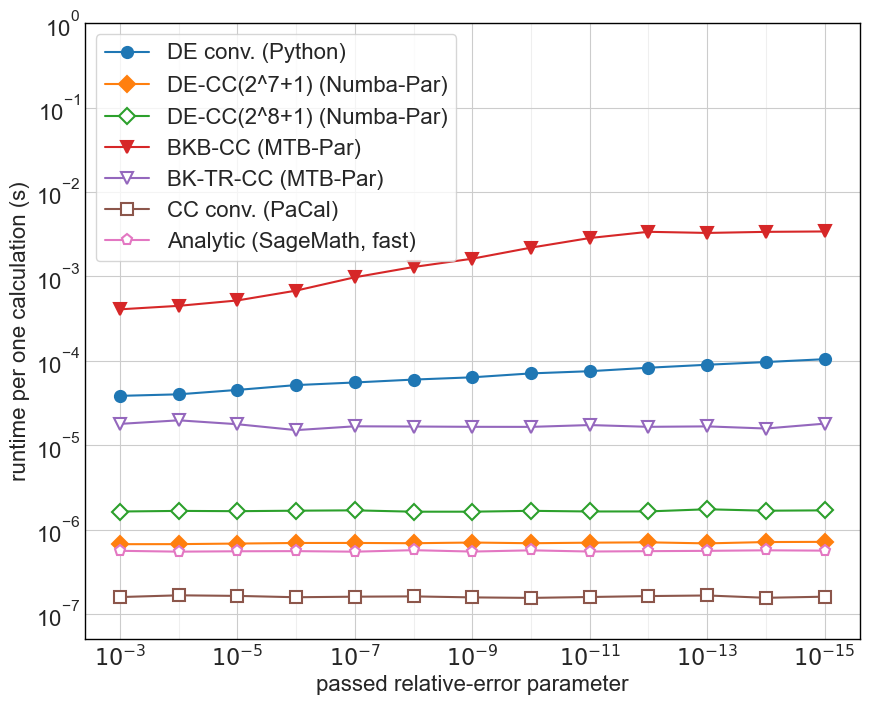

In [33]:
from matplotlib.ticker import MultipleLocator

plt.rcParams['font.size'] = '16'
plt.rcParams['lines.markersize'] = '8'

x = times.index

fig, ax = plt.subplots(figsize=(10,8))
for method, kwarg in Label.items():
    if 'init' in method: 
        method = method.replace('-init','')
        ax.plot(x,times[method]+dt, markeredgewidth=1.5, **kwarg)
    else:
        ax.plot(x,times[method], markeredgewidth=1.5, **kwarg)

ax.set_yscale('log')
ax.set_ylim(0.5e-7, 1e-0)

ax.set_xticks(range(3,16,2))
ax.set_xticklabels(['$10^{-'+str(n)+'}$' for n in range(3,16,2)])
#ax.set_yticklabels(['1e-'+str(n) for n in [6,5,4,]])
ax.set_xlabel('passed relative-error parameter')
ax.set_ylabel('runtime per one calculation (s)')


leg = ax.legend(frameon=True, loc='upper left')

ax.minorticks_on()
minorXlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorXlocator)
ax.grid(which='minor', axis='x', linestyle='-', alpha=0.3)

plt.setp(ax.spines.values(), color='black');

plt.savefig('data/RunTimesPlot.png', dpi=300, bbox_inches='tight')

In [47]:
methodlist

['DE-conv',
 'DE-conv-n',
 'DE-conv-p',
 'DE-CC(2^7+1)',
 'DE-CC(2^8+1)',
 'BK-CC-sym',
 'BK-CC-sym-p',
 'CC-conv',
 'CC-conv-init',
 'Analytic']

In [70]:
ekwargs = [{'label':'DE conv. (Python)', 'marker':'o'}, 
          {'label':'DE-CC(2^7+1) (Numba-Par)', 'marker':'D', },
          {'label':'DE-CC(2^8+1) (Numba-Par)', 'marker':'D', 'markerfacecolor':'w'},
          {'label':'BKB-CC (MTB-Par)', 'marker':'v'},
          {'label':'BK-TR-CC (MTB-Par)', 'marker':'v', 'markerfacecolor':'w'},
          {'label':'CC conv. (PaCal)', 'marker':'s', 'markerfacecolor':'w'},
          {'label':'Analytic (SageMath, fast)', 'marker':'p', 'markerfacecolor':'w'}
          ]
methodlist = ['DE-conv', 'DE-CC(2^7+1)', 'DE-CC(2^8+1)',
       'BK-CC-sym-p', 'BK-TR-CC-sym','CC-conv', 'Analytic']

Label = {key:kwarg for key, kwarg in zip(methodlist, ekwargs)}

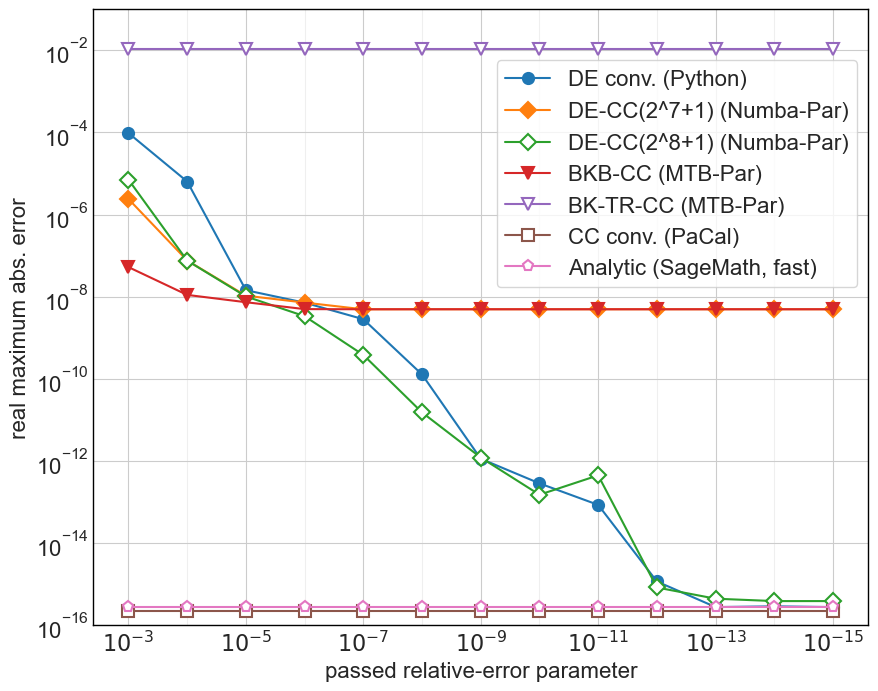

In [41]:
from matplotlib.ticker import MultipleLocator

plt.rcParams['font.size'] = '16'
plt.rcParams['lines.markersize'] = '8'

x = times.index

fig, ax = plt.subplots(figsize=(10,8))
for method, kwarg in Label.items():
    ax.plot(x,maxerrs[method], markeredgewidth=1.5, **kwarg)
ax.set_yscale('log')
ax.set_ylim(1e-16, 1e-1)

ax.set_xticks(range(3,16,2))
ax.set_xticklabels(['$10^{-'+str(n)+'}$' for n in range(3,16,2)])
#ax.set_yticklabels(['1e-'+str(n) for n in [6,5,4,]])
ax.set_xlabel('passed relative-error parameter')
ax.set_ylabel('real maximum abs. error')


leg = ax.legend(frameon=True, loc='upper right', bbox_to_anchor=(1, 0.935))

ax.minorticks_on()
minorXlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorXlocator)
ax.grid(which='minor', axis='x', linestyle='-', alpha=0.3)

plt.setp(ax.spines.values(), color='black');

plt.savefig('data/ErrorPlot.png', dpi=300, bbox_inches='tight')

In [137]:
# plot_kwargs = {'figsize':(10,7), 'fontsize':14}
# fig = times.plot(logy=True, ylim = (1e-6, 1e-3),  **plot_kwargs);

In [138]:
# ***
# <a id=references></a>
# # <font color=brown> References </font>
# This notebook belongs to supplementary materials of the paper submitted to Journal of Statistical Computation and
# Simulation and available at  <https://arxiv.org/abs/2105.04427>.
# * Hančová, M., Gajdoš, A., Hanč, J. (2021). A practical, effective calculation of gamma difference distributions with open data science tools. arXiv:2105.04427 [cs, math, stat], https://arxiv.org/abs/2105.04427

# ### Abstract of the paper

# At present, there is still no officially accepted and extensively verified implementation of computing the gamma difference distribution allowing unequal shape parameters. We explore four computational ways of the gamma difference distribution with the different shape parameters resulting from time series kriging, a forecasting approach based on the best linear unbiased prediction, and linear mixed models. The results of our numerical study, with emphasis on using open data science tools, demonstrate that our open tool implemented in high-performance Python(with Numba) is exponentially fast, highly accurate, and very reliable. It combines numerical inversion of the characteristic function and the trapezoidal rule with the double exponential oscillatory transformation (DE quadrature). At the double 53-bit precision, our tool outperformed the speed of the analytical computation based on Tricomi's $U(a, b, z)$ function in CAS software (commercial Mathematica, open SageMath) by 1.5-2 orders. At the precision of scientific numerical computational tools, it exceeded open SciPy, NumPy, and commercial MATLAB 5-10 times. The potential future application of our tool for a mixture of characteristic functions could open new possibilities for fast data analysis based on exact probability distributions in areas like multidimensional statistics, measurement uncertainty analysis in metrology as well as in financial mathematics and risk analysis. 